In [2]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt
from envs import Maze

%matplotlib inline

In [3]:
env = Maze()

In [4]:
initial_state = env.reset()
print(f"Initial_State: {initial_state}")

Initial_State: (0, 0)


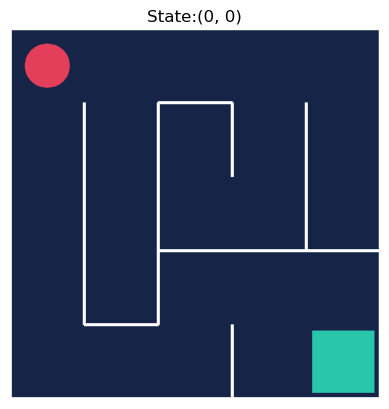

In [5]:
frame = env.render(mode="rgb_array")
plt.axis('off')
plt.title(f"State:{initial_state}")
plt.imshow(frame)

In [8]:
action = env.action_space.sample()
state = env.reset()
next_state, reward, done, additional_info = env.step(action)
print(f"CurrentState:{state} \naction:{action} \nNextState:{next_state} \nReward:{reward} \ndone:{done}")

CurrentState:(0, 0) 
action:1 
NextState:(0, 1) 
Reward:-1.0 
done:False


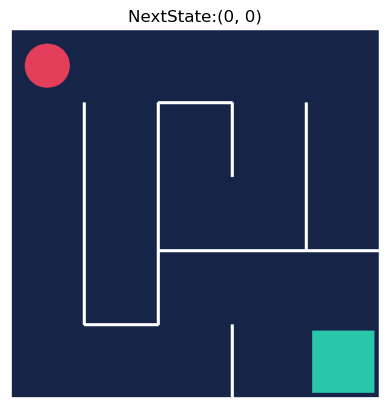

In [7]:
frame = env.render(mode="rgb_array")
plt.axis('off')
plt.title(f"NextState:{next_state}")
plt.imshow(frame)

In [8]:
env.close()

In [9]:
#Trajectory
env = Maze()
state = env.reset()
trajectory = []

for _ in range(5):
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    trajectory.append([state,action,reward,done,next_state])
    state = next_state
env.close()

print(trajectory)

[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 3, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)]]


In [10]:
#Episode
env = Maze()
state = env.reset()
episode = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    episode.append([state,action,reward,done,next_state])
    state = next_state
env.close()

print(episode)

[[(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 0, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 2, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 0, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 3, -1.0, False, (0, 0)], [(0, 0), 2, -

In [11]:
#Reward and return
env = Maze()
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f"Reward is {reward} for taking action {action} in current state {state}")
env.close()

Reward is -1.0 for taking action 2 in current state (0, 0)


In [12]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0

while not done:
    action = env.action_space.sample()
    _,reward,done,_ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(f"took {t} moves to find exit \n the reward on each move was {reward} and the total return is {G_0}")

took 69 moves to find exit 
 the reward on each move was -1.0 and the total return is -50.01629701008006


In [13]:
def random_policy(state):
    return np.array([0.25] * 4)

In [14]:
env = Maze()
state = env.reset()
action_probabilities = random_policy(state)

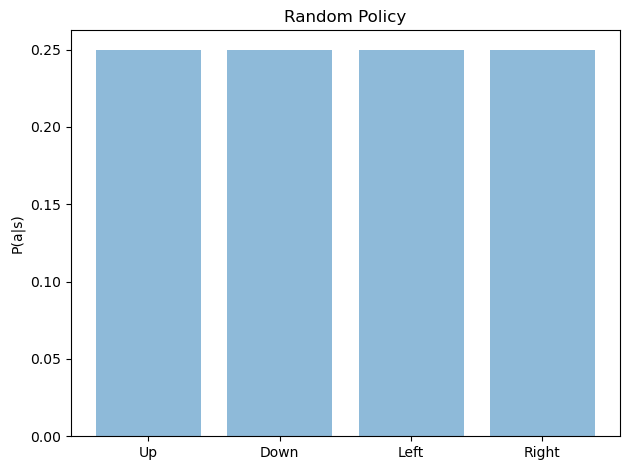

In [15]:
objects = ('Up','Down','Left','Right')
y_pos = np.arange(len(objects))
plt.bar(y_pos, action_probabilities, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('P(a|s)')
plt.title('Random Policy')
plt.tight_layout()

plt.show()
env.close()

Took 73 moves to reach the exit


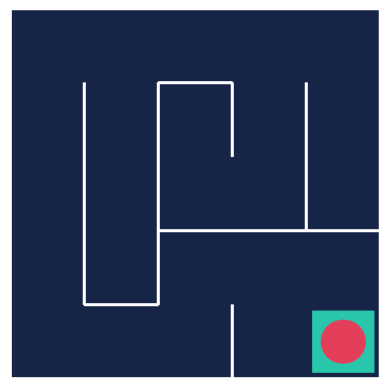

In [17]:
#Playing an episode on maze
env = Maze()
state = env.reset()
done = False
img = plt.imshow(env.render(mode="rgb_array"))
t = 0
while not done:
    t+=1
    action = np.random.choice(range(4), 1, p=action_probabilities)
    next_state,reward,done,_ = env.step(action)
    img.set_data(env.render(mode="rgb_array"))
    plt.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
env.close()

print(f"Took {t} moves to reach the exit")